# A1-Q5: Parametric Spline

In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import math

## (a) Write your nickname and display it

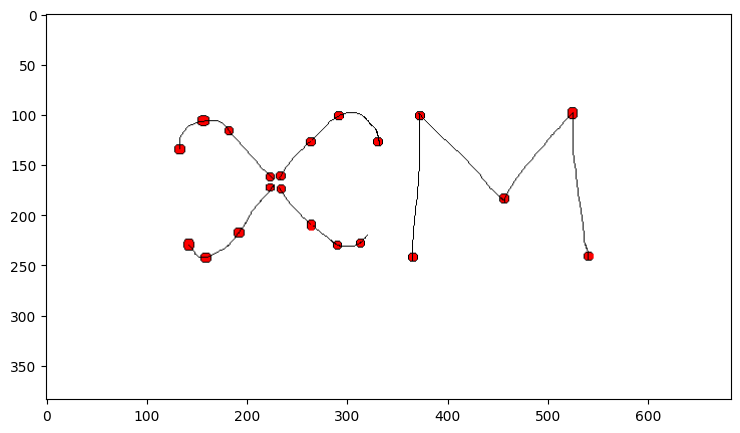

In [2]:
# Display nickname image
f = plt.imread('xm_3.png')
plt.figure(figsize=(9,5)); plt.imshow(f);


## (b) Hardcode interpolation points

In [3]:
# === YOUR CODE HERE ===
s1x, s1y = [130,155,180,230], [135,110,120,170]
s2x, s2y = [135,160,190,230], [230,245,220,175]
s3x, s3y = [235,260,285,330], [165,125,285,130]
s4x, s4y = [235,260,280,315], [170,215,230,230]
s5x, s5y = [365,370,455,520,535], [245,105,180,110,245]
segments = [(s1x,s1y),(s2x,s2y),(s3x,s3y),(s4x,s4y),(s5x,s5y)]


## (c) `ParametricSpline`

In [25]:
def ParametricSpline(Sx,Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.
       
       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    # These lines are just placeholders... replace them
    t = np.zeros_like(Sx)

    # === YOUR CODE HERE ===
    #l, r = [(2, 0.0)], [(2, 0.0)]
    assert(len(Sx) == len(Sy))
    #print(len(Sx))
    for i in range(1,len(Sx)):
        #print(((Sx[i] - Sx[i-1]) ** 2 + (Sy[i] - Sy[i-1])))
        t[i] = t[i-1] + math.sqrt((Sx[i] - Sx[i-1]) ** 2 + (Sy[i] - Sy[i-1]) ** 2)
    x_cs = make_interp_spline(t, Sx, k=3)#,bc_type=(l, r))
    y_cs = make_interp_spline(t, Sy, k=3)
    b = x_cs(t)
    c = y_cs(t)
    print(b,c)
    return x_cs, y_cs, t

In [26]:
print(ParametricSpline(s1x,s1y))
print(s1x, s1y)
#xx = np.linspace(x[0], x[-1], 100)
#plt.plot(x, y, 'ro')
#plt.plot(xx, cs(xx));

[130. 155. 180. 230.] [135. 110. 120. 170.]
(<scipy.interpolate._bsplines.BSpline object at 0x14c72a190>, <scipy.interpolate._bsplines.BSpline object at 0x14c72ab20>, array([  0,  35,  61, 131]))
[130, 155, 180, 230] [135, 110, 120, 170]


## (d) Find parametric splines for each segment

In [28]:
# === YOUR CODE HERE ===
splines = []
for s in segments:
    splines.append(ParametricSpline(s[0],s[1]))

[130. 155. 180. 230.] [135. 110. 120. 170.]
[135. 160. 190. 230.] [230. 245. 220. 175.]
[235. 260. 285. 330.] [165. 125. 285. 130.]
[235. 260. 280. 315.] [170. 215. 230. 230.]
[365. 370. 455. 520. 535.] [245. 105. 180. 110. 245.]


## (e) Plot the segments

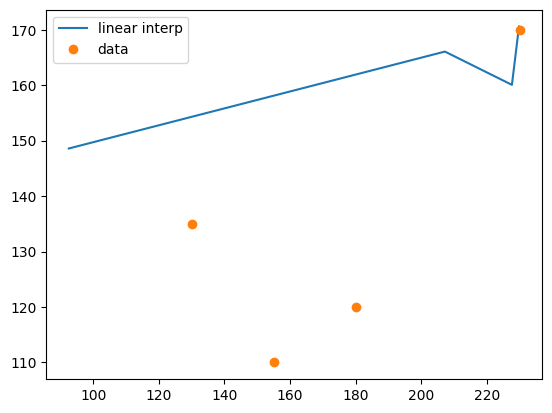

In [29]:
# === YOUR CODE HERE ===
plt.plot(splines[0][0](s1x), splines[0][1](s1y), '-', label='linear interp')
plt.plot(s1x, s1y, 'o', label='data')
plt.legend(loc='best')
plt.show()